## Question1

### 1(a) The Perceptron algorithm

In [18]:
import numpy as np

def perceptron_algo(X,Y):
    L=1                                  # L is learning rate(assigned as 1 for classical perceptron algorithm)
    rows=len(X)
    cols=len(X[0])
    W=np.ones(cols)                      # initial value of hyperplane normal vector W
    no_update_limit=100                  # if W doesn't update since more than this then W has converged
    iterations_since_last_update=0
    
    '''run a loop for 100 times the length of training data. I could have run it until algorithm converges but incase 
    convergence is not possible then it will go into infite loop'''
    iterations=100*rows           #number of loop iterations
    for i in range(iterations):
        #pick a random data
        n=np.random.randint(0,rows)
        Xi=X[n]
        yi=Y[n]
        
        #if mistake happens then updata W 
        '''Note that a mistake is said to happen when positive point lies on negative side or a negative point lies 
        on positive side of the hyperplane. The direction of vector W is considered the positive side.'''
        if np.dot(W,Xi)*yi<0:
            W = W+yi*Xi
            iterations_since_last_update=0
        else:
            iterations_since_last_update=iterations_since_last_update+1
            
        #if update hasn't happend since a lot of time then algorithm has converged.So break out of loop.
        if(iterations_since_last_update>no_update_limit):
            break;
            
    return W
    

### 1(b)

In [19]:
import pandas as pd

banknotes_df=pd.read_csv('data_banknote_authentication.txt',sep=",",header=None) 
banknotes_df

'''Pre-processing banknote dataset'''
banknotes_df.isnull().sum()   # running this shows there are no null or missing values

#running these shows all values in each column are integer type 
banknotes_df[0].dtype
banknotes_df[1].dtype
banknotes_df[2].dtype
banknotes_df[3].dtype
banknotes_df[4].dtype



#Creating training and test data in 80:20 ratio
dataset_array=banknotes_df.to_numpy() #dataframe to numppy array

np.random.shuffle(dataset_array)      # randomly shuffling data before separating test and training set
train_set=dataset_array[0:int(round(0.8*len(dataset_array)))]   #rows from 0 to 0.8*total rows in dataset
test_set=dataset_array[int(round(0.8*len(dataset_array))) :]    #rows from 0.8*total rows in dataset to last row
#converting 0 labels to -1
test_set[...,4:][test_set[...,4:]==0]=-1
train_set[...,4:][train_set[...,4:]==0]=-1



### function to make prediction using perceptron algorithm

In [20]:
X=train_set[...,0:4]              # X stores features
Y=train_set[...,4:]               # Y stores target value( or labels)
Y=Y.astype(int)                   # converting labels from float to integer
W = perceptron_algo(X,Y)           # W is the normal vector of hyperplane. This hyperplane separates positive and negative points.

def prediction_func(X,Y,validation_set):
    W = perceptron_algo(X,Y)           # W is the normal vector of hyperplane. This hyperplane separates positive and negative points.
    
    errors=0
    for i in range(len(validation_set)):
        
        x_validate=validation_set[...,0:4][i]
        y_validate=validation_set[...,4:][i]
        if (np.dot(W,x_validate)*y_validate) < 0:
            errors=errors+1
    error_ratio=errors/len(validation_set)
    return error_ratio



### 1(c)

In [21]:
#Performing 10 fold cross validation

np.random.shuffle(train_set)
n=len(train_set)
jump_length=n/10          # used in each fold of cross validation
for i in range(10):
    #creating validation set for cross validation
    start_index=int(round(i*jump_length))
    end_index=int(round(start_index+jump_length))
    end_index=n-1 if (end_index>=n) else end_index      # if end_index has moved beyond last index then set end index to last index 
    validation_set=train_set[start_index:end_index,...]
    
    #create training set for cross validation
    training_set=train_set[0]
    for j in range(n):
        if j>=start_index and j<=end_index:
            continue
            
        training_set=np.vstack([training_set,train_set[j]])
        
    # Start training the model and test it on current validation set
    X=training_set[...,0:4]              # X stores features
    Y=training_set[...,4:]               # Y stores target value( or labels)
    
    #find error ratio
    mylist=[]
    error_ratio = prediction_func(X,Y,validation_set)             
    mylist.append(error_ratio)
    
# mean value of all errors in each validation set
mean_error_ratio=0
for k in range(len(mylist)):
    mean_error_ratio=mean_error_ratio+mylist[k]
mean_error_ratio=mean_error_ratio/len(mylist)
print(mean_error_ratio)

0.10091743119266056


### 1(d)

In [280]:
precision=truepos/(truepos+falsepos)
recall=truepos/(truepos+falseneg)
F1score=(2*precision*recall)/(precision+recall)
print(F1score)

TypeError: object of type 'numpy.float64' has no len()

## Question2

### 2(a)

__Bayesian Posterior Distribution with known variance and unknown mean__

Let mean and variance of sampled data be $\mu$ and $\sigma$ respectively.
Let mean and variance of prior be $\mu_p$ and $\sigma_p$ repectively.
Let there be n iid samples drawn from normal distribution.


Bayesian posterior distribution, 
$$f(\mu | x_1,x_2,...,x_n) \propto f(x_1,x_2,...,x_n | \mu) *f(\mu) \quad \quad -equation(1)$$

The first term is called likelihood and second term is prior.

$$ $$
$$Likelihood=f(x_1,x_2,...,x_n | \mu)$$

$$ =\prod_{i=1}^{n} exp\{-\frac{(x_i - \mu)^2}{2\sigma ^2}\} \quad ...\text{because samples are iid}$$
$$=exp\{-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma ^2}\}$$

$$ $$
$$ $$
$$Prior=f(\mu)$$
$$=exp\{-\frac{(\mu - \mu_p)^2}{2\sigma_p ^2}\}$$

From quation(1),
$$f(\mu | x_1,x_2,...,x_n) \propto exp\{-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma ^2}\}*exp\{-\frac{(\mu - \mu_p)^2}{2\sigma_p ^2}\}$$
$$\propto exp\{-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma ^2}  -\frac{(\mu - \mu_p)^2}{2\sigma_p ^2}\}$$
$$\propto exp\{-\frac{\sum_{i=1}^n x_i^2 + \sum_{i=1}^n \mu^2 -2\mu \sum_{i=1}^n x_i}{2\sigma ^2}  -\frac{(\mu^2 + \mu_p ^2 -2\mu \mu_p)}{2\sigma_p ^2}\}$$
$$\propto exp\{\mu^2 [\frac{-n}{2\sigma ^2}  -\frac{1}{2\sigma_p ^2}] -2\mu[\frac{-\sum_{i=1}^n x_i}{2\sigma^2}-\frac{\mu_p}{2\sigma_p ^2}] + -\frac{\sum_{i=1}^n x_i ^2}{2\sigma^2} - \frac{\mu_p ^2}{2\sigma_p ^2}\} \quad ...equation(2)$$


If we assume mean and variance of posterior distribution to be $\mu_{post}$ and $\sigma_{post}$ respectively, then distribution of posterior will be of the form:
$$constant*exp\{-\frac{(\mu - \mu_{post})^2}{2\sigma_{post} ^2}\}$$
$$\propto exp\{-\frac{\mu^2 + \mu_{post} ^2 -2\mu\mu_{post}}{2\sigma_{post} ^2}\} \quad ...equation(3)$$

Comparing the coefficient of $\mu^2$ in equation(2) and equation(3):
$$\mu^2[-\frac{1}{2\sigma_{post} ^2}]=\mu^2[-\frac{n}{2\sigma^2}-\frac{1}{2\sigma_{p} ^2}]$$
$$\frac{1}{\sigma_{post} ^2}=\frac{n}{\sigma^2}+\frac{1}{\sigma_p ^2}$$
$$\sigma_{post} ^2 =\frac{\sigma ^2 \sigma_p ^2}{n \sigma_p ^2 + \sigma^2} \quad ...\text{Variance of bayesian posterior distribution}$$

Comparing the coefficients of $\mu$ in equation(2) and equation(3):
$$\frac{-2\mu \mu_{post}}{-2\sigma_{post} ^2} = -2\mu[-\frac{\sum_{i=1}^{n} x_i}{2\sigma^2} - \frac{\mu_p}{2\sigma_p ^2}]$$
$$\mu_{post}=\sigma_{post} ^2[\frac{\sum_{i=1}^n x_i}{\sigma^2} + \frac{\mu_p}{\sigma_p ^2}]$$
$$\mu_{post}=\frac{\sigma_p ^2 \sum_{i=1}^n x_i + \mu_p \sigma^2}{n\sigma_p ^2 + \sigma^2} \quad ....\text{Mean of bayesian posterior distribution}$$


Hence, the posterior distribution is:
$$\frac{1}{(2\pi \sigma_{post} ^2)^{1/2}}exp\{-\frac{(\mu - \mu_{post})^2}{2\sigma_{post} ^2}\}$$

where $\mu_{post}=\frac{\sigma_p ^2 \sum_{i=1}^n x_i + \mu_p \sigma^2}{n\sigma_p ^2 + \sigma^2}$ and $ \sigma_{post} ^2 =\frac{\sigma ^2 \sigma_p ^2}{n \sigma_p ^2 + \sigma^2}$
This is a general formula for n iid samples.

According to question,

$\mu_p = 25 $

$\mu=10$

$\sigma_p=5$

$\sigma=5$

$n=50$

So, $\mu_{post}=\frac{25 \sum_{i=1}^n x_i + 625}{1275}$ and $ \sigma_{post} ^2 =\frac{625}{1275}=\frac{25}{51}$

In [275]:
#function to compute posterior probability
def calc_posterior_prob(X):           # Given X is an array of data calculate the posterior probability
    mu_post=(25*np.sum(X)+625)/1275   # posterior analytic mean
    sigma_post=sqrt(25/51)            # posterior analytic sigma
    post_prob=(2.71828**(-((X-mu_post)**2)/(2*(sigma_post**2))))/math.sqrt((sigma_post**2)*44/7)
    return post_prob
    

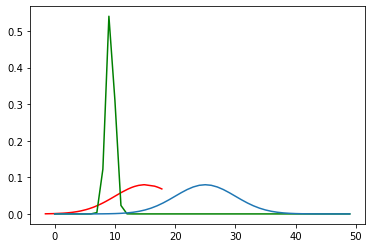

In [276]:
import math
import matplotlib.pyplot as plt
Y=np.random.normal(10,5,50)      # sampling 50 points for likelihood data
Y=np.sort(Y)
param=np.array([15])
param=np.sort(param)
likelihood_func=(2.71828**(-((Y-param)**2)/(2*(5**2))))/math.sqrt((5**2)*44/7)  #likelihood is a function of mu
plt.plot(Y,likelihood_func,color='red')

mu_post=(25*np.sum(Y)+625)/1275        # posterior mean
sigma_post=math.sqrt(25/51)            # posterior sigma

X=np.arange(50)                        # creating 50 points for x axis
post_func=(2.71828**(-((X-mu_post)**2)/(2*(sigma_post**2))))/math.sqrt((sigma_post**2)*44/7)  # corresponding y axis points
plt.plot(X,post_func,color='green')

mu=np.arange(50)            
prior_func=(2.71828**(-((mu-25)**2)/(2*(5**2))))/math.sqrt((5**2)*44/7)
plt.plot(mu,prior_func)

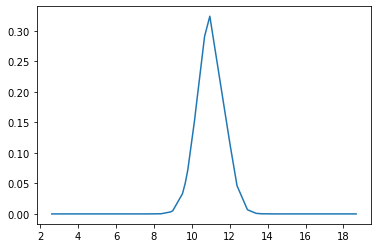

In [277]:
X=np.random.normal(10,5,50)       
mu_post=(25*np.sum(X)+625)/1275   # posterior mean
sigma_post=math.sqrt(25/51)            # posterior sigma


X=np.sort(X)

post_func=(2.718**(-((X-mu_post)**2)/(2*(sigma_post**2))))/((sigma_post**2)*44/7)

plt.plot(X,post_func)

### 2(b) Metropolis-Hasting Algorithm

In [278]:
#function to calculate likelihood value
def likelihood(X,mean,SD):
    result=(2.71828**(-(np.sum((X-mean)**2))/(2*(SD**2))))/math.sqrt((SD**2)*44/7)
    return result

#function to calculate value of prior for given mu
def prior(mu,mu_mean,SD):
    result=(2.71828**(-((mu-mu_mean)**2)/(2*(SD**2))))/math.sqrt((SD**2)*44/7)
    return result

In [239]:
#function to draw the histogram plot
def metropolis(SD,iterations,mu0):        #SD=standard dev of proposed distribution , iterations=no of iterations to run metropolis algo , mu0= intial value of mu
    convergence_threshold=5000 #If there hasn't been any jump for more than threshhold then metropolis has converrged
    
    mylist=[]                  #this list will store the ACCEPTED points. Histogram of this list will be plotted. 
    mylist.append(mu0[0])      #add the initial point
    SD=10                      # standard deviation of proposal distribution
    X=np.random.normal(10,5,50)   # sampling 50 data points fromm a normal distribution with mean 10 and SD=5 to be used in likelihood function 
    
    no_jump=0
    k=0                   #iteration counter
    while(k<iterations):        
        muN=np.random.normal(mu0,SD,1)       #sample the next 'proposed' value of mu , where mu is prior variable
        
        #r is (posterior of proposed mu)/(posterior of old mu)
        r=(likelihood(X,muN,5) * prior(muN,25,5))/(likelihood(X,mu0,5) * prior(mu0,25,5))
        
        #if r is greater than 1 then accept the proposed value of mu
        if r>1:
            mylist.append(muN[0])   #add proposed mu to list because we have accepted it
            mu0=muN                 #set old mu to new mu
            no_jump=0               #we have accepted proposed mu, so we JUMP to this mu. Hence restting no_jump to 0
          
        #if r<1, don't directly neglect proposed mu. Pick a random number u sampled from uniform distribution and if r>u then accept the proposed mu, else reject it
        else:
            u=np.random.uniform(0,1,1)
            if r>u:
                mylist.append(muN[0])
                mu0=muN
                no_jump=0
                
            # finally now you reject proposed mu because it didn't pass any of the above conditions
            else:
                mylist.append(mu0[0])  #here I am putting old mu to the list to give it some more weightage because its posterior is 'better' than proposed mu
                no_jump=no_jump+1      #we didn't jump rather stayed at old mu.
         
        
        k=k+1   
        
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.title('Metropolis histogram vs Bayesian Analytic density\n\n',fontweight ="bold")
    
    # Removing starting points from list so that histogram depends lesser on initial choice of point(here mu0)
    remove_points=int(round(0.1*len(mylist)))
    for i in range (remove_points):
        mylist.remove(mylist[0])
        
    #plot metropolis histogram
    plt.hist(mylist,500,density=1)         #mylist contains all ACCEPTED mu values
    
    #plot analytic posterior
    Z=np.arange(50)                        # x-cordinates for posterior plot
    mu_post=(25*np.sum(X)+625)/1275        # posterior mean calculated analytically
    sigma_post=math.sqrt(25/51)            # posterior sigma calculated analytically
    post_func=(2.71828**(-((Z-mu_post)**2)/(2*(sigma_post**2))))/math.sqrt((sigma_post**2)*44/7)  # corresponding y axis points
    plt.plot(Z,post_func,color='red')
    
    plt.legend(["Analytic posterior","histogram/metropolis"])
    plt.show()
    

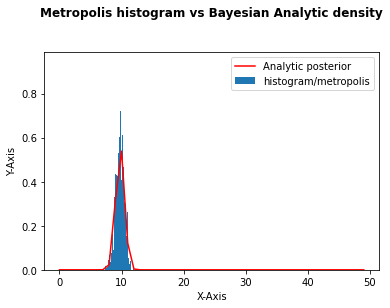

In [240]:
#calling metropolis algorithm
metropolis(10,100000,np.array([1]))

### 2(c)

__Dependence of convergence on SD:__
If SD is very small then proposed $\mu$ values will be closer to each other with high probability. If we take an initial value of $\mu$ which is far away from actual posterior then histogram will take more iterations to converge to actual posterior. In lesser iterations it won't converge.

If SD is very large then proposed $\mu$ values will be far away from each other with decent probability. If number of iterations is less then it might not converge because it might go to propose distant values of $\mu$ which are away from actual mean of posterior and hence waste our iterations. So more number of iterations will be required to propose correct values of $\mu$.

Also, for large SD since far apart values of $\mu$ are proposed, many of them will get ACCEPTED also over time, hence our histogram will be wider as compared ot histogram of smaller SD.

Dependence on intial value of $\mu$ : If initial value of $\mu$ goes beyond a certain point then more iterations will be required for $\mu$ to reach towards actual posterior.

Consequences of using sub-optimal proposal width and terminating sampling too soon:-

__SMALL SD__

<ipython-input-239-15d784a5f45c>:16: RuntimeWarning: invalid value encountered in true_divide
  r=(likelihood(X,muN,5) * prior(muN,25,5))/(likelihood(X,mu0,5) * prior(mu0,25,5))


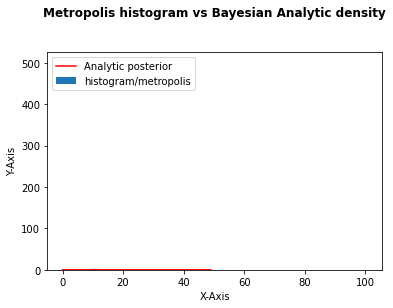

"notice that there is no histogram plot because convergence hasn't happened for such less iterations.  "

In [257]:
#Here I am taking SD=1(very small) and interations=200(also small and initial value mu0=100(far away from actual posterior mean))
metropolis(1,5000,np.array([100]))
'''notice that there is no histogram plot because convergence hasn't happened for such less iterations.  '''

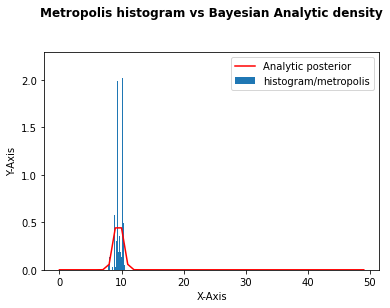

In [256]:
'''Notice here we have same number of iterations and SD but initial value of mu0 is close to actual posterior mean
so there is little histogram plot which shows it is trying to converge'''
metropolis(1,5000,np.array([10]))

__LARGE SD__

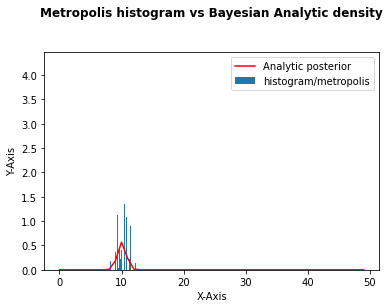

In [265]:
'''Notice here that SD is 100(large) and eventhough mu0 is 5(very close to actual posterior mean) histogram is not able to converge properly in less iterations'''
metropolis(400,3000,np.array([5]))

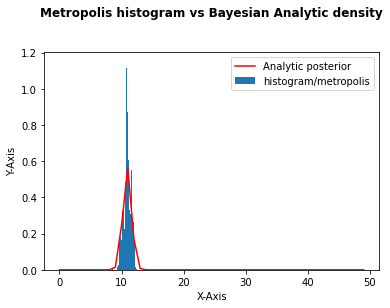

In [266]:
'''On increasing the number of iterations'''
metropolis(200,30000,np.array([5]))

__The above 2 observations show that neither large SD is good nor small SD is good.__

# 